In [9]:
from typing_extensions import TypedDict #Used to represent Data in the form of a dictionary inside a class
class state(TypedDict): 
    graph_info:str

In [10]:
def start_play(state):
    print("Start_play node has been called")
    return {"graph_info": state["graph_info"]+"I am planning to play a game."}

def cricket(state):
    print("Cricket node has been called")
    return {"graph_info": state["graph_info"]+"I am playing cricket."}

def football(state):
    print("Football node has been called")
    return {"graph_info": state["graph_info"]+"I am playing football."} 

def end_play(state):
    print("End_play node has been called")
    return {"graph_info": state["graph_info"]+"I have finished playing the game."}

In [20]:
import random
from typing import Literal

def random_play(state: dict) -> Literal['cricket', 'football']:
    graph_info = state['graph_info']

    if random.random() > 0.5:
        return "cricket"
    else:
        return "football"


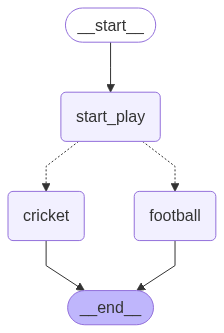

In [21]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START,END

graph=StateGraph(state)

graph.add_node("start_play", start_play)
graph.add_node( "cricket", cricket)
graph.add_node("football", football)  

graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("football", END)

graph_builder= graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [22]:
graph_builder.invoke({"graph_info": "My name is Pravin"})

Start_play node has been called
Football node has been called


{'graph_info': 'My name is PravinI am planning to play a game.I am playing football.'}